# Alex Net

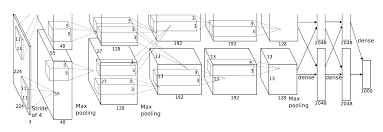

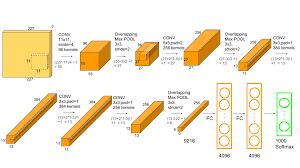

1st Image size ----- 227x227x3

formula convolution operation finding image size

((Imagesize-filtersize+2padding)/stride)+1

so --> (227-11+2*0)+1 -> 55

so --> Image size for second layer is 55x55x3

3rd layer image size -> (55-3+0)+1 -> 27

so image size --> 27x27x3


Convolution-11-- Maxpool-3-- Convolution-5-- Maxpool-3- Convolution-3-- Convolution-3-- Convolution-3-- Maxpool-3- FC- FC- Output_layer-1000classes(sofmax)


In [3]:
import tensorflow as tf


In [2]:
tf.__version__


'1.14.0'

In [ ]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D,BatchNormalization

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np
np.random.seed(1000)
#Instantiate an empty model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding=’valid’))
model.add(Activation(‘relu’))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding=’valid’))

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding=’valid’))
model.add(Activation(‘relu’))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding=’valid’))

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding=’valid’))
model.add(Activation(‘relu’))

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding=’valid’))
model.add(Activation(‘relu’))

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding=’valid’))
model.add(Activation(‘relu’))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding=’valid’))

# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation(‘relu’))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))

# 2nd Fully Connected Layer
model.add(Dense(4096))
model.add(Activation(‘relu’))
# Add Dropout
model.add(Dropout(0.4))

# 3rd Fully Connected Layer
model.add(Dense(1000))
model.add(Activation(‘relu’))
# Add Dropout
model.add(Dropout(0.4))

# Output Layer
model.add(Dense(17))
model.add(Activation(‘softmax’))

model.summary()

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=’adam’, metrics=[“accuracy”])



## VGG

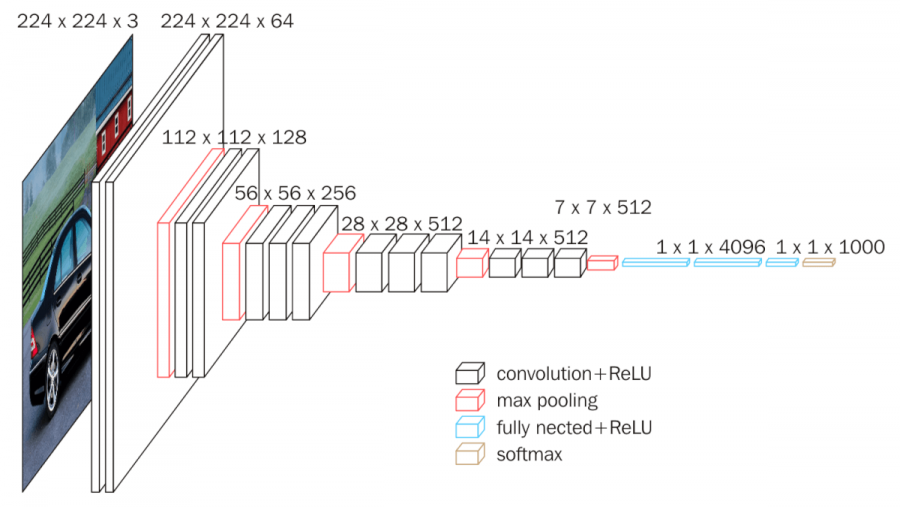

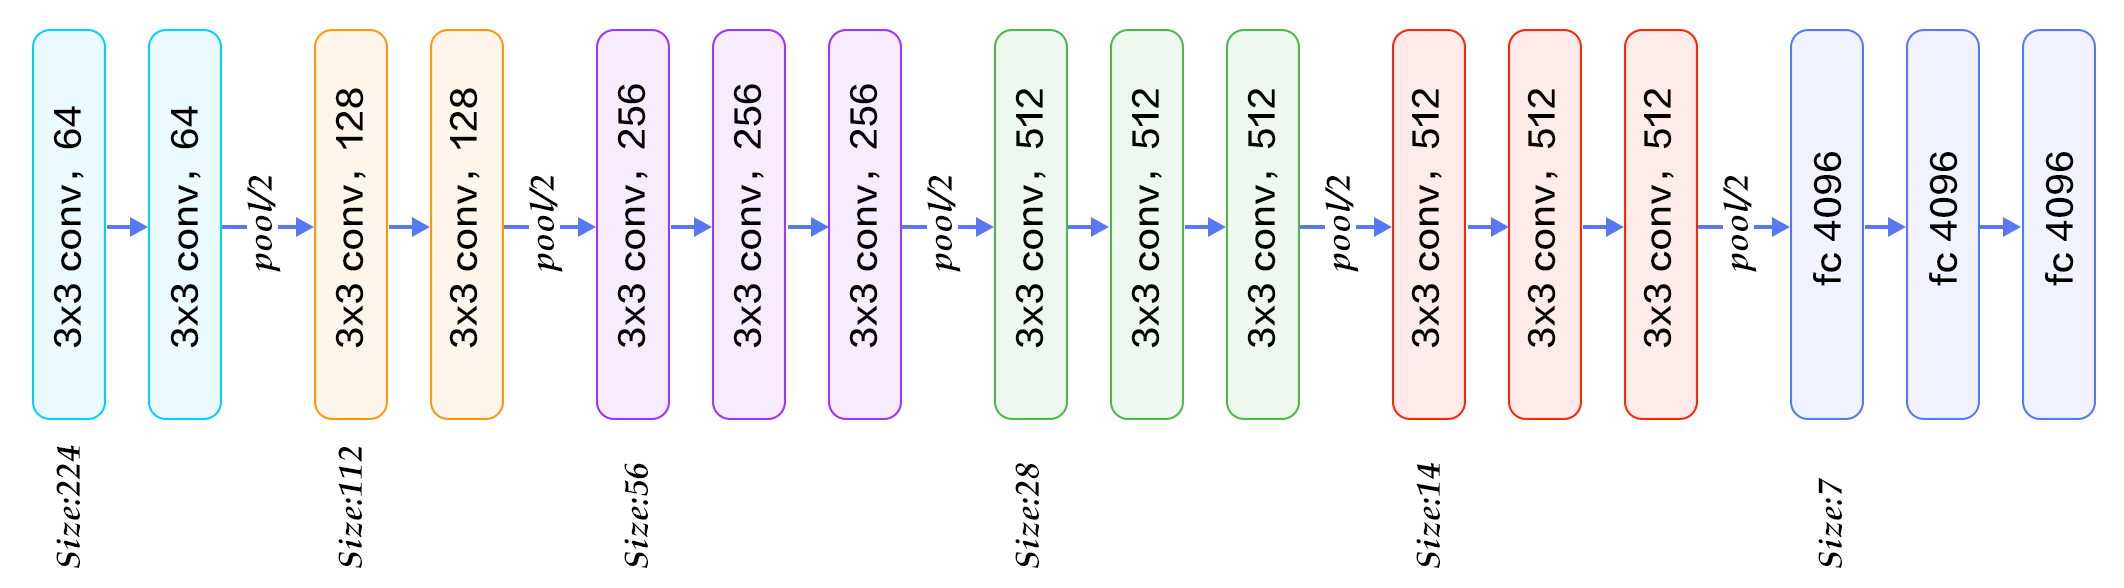

-> Alexnet Issues that resolved in VGG:
   1. AlexNet --> Too much variation in filter size, padding.
   2. VGG16 --> All convolution neuralnet will be having 3x3 filter 1 stride and padding same, no variation ---> maxpooling
    
   3. Alexnet has only 7 layers where as vgg has more 16 layers which helps getting features more precisilu.
    
    

# Code

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
import tensorflow as tf
print(tf.__version__)


In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [ ]:
# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False


In [ ]:
# useful for getting number of output classes
folders = glob('Datasets/train/*')

In [ ]:
folders

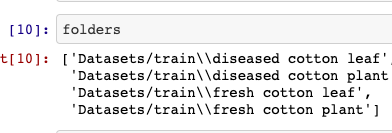

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)


In [ ]:
len(folders)


In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)


In [ ]:
# view the structure of the model
model.summary()


In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


In [ ]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')
